In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
##Loading the dataset

In [48]:
df=pd.read_excel(r"C:\Users\Lenovo\Desktop\PROJECT 5\telcom_data.xlsx")

In [3]:
df.head(5)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [49]:
df.shape

(150001, 55)

Data has 150001 rows and 55 columns

In [50]:
# Convert the specified columns to string
df['IMSI'] = df['IMSI'].astype(str)
df['MSISDN/Number'] = df['MSISDN/Number'].astype(str)
df['IMEI'] = df['IMEI'].astype(str)

# Verify the conversion
print(df[['IMSI', 'MSISDN/Number', 'IMEI']].dtypes)

IMSI             object
MSISDN/Number    object
IMEI             object
dtype: object


# Data Cleaning

Missing Values

In [51]:
df.isnull().sum()

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                             0
MSISDN/Number                                    0
IMEI                                             0
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [52]:
num_empty_strings = (df['Bearer Id'] == '').sum()
print("Number of empty strings:", num_empty_strings)

Number of empty strings: 991


In [53]:
df = df[df['Bearer Id'] != '']

In [55]:
num_empty_strings = (df['Bearer Id'] == '').sum()
print("Number of empty strings:", num_empty_strings)

Number of empty strings: 0


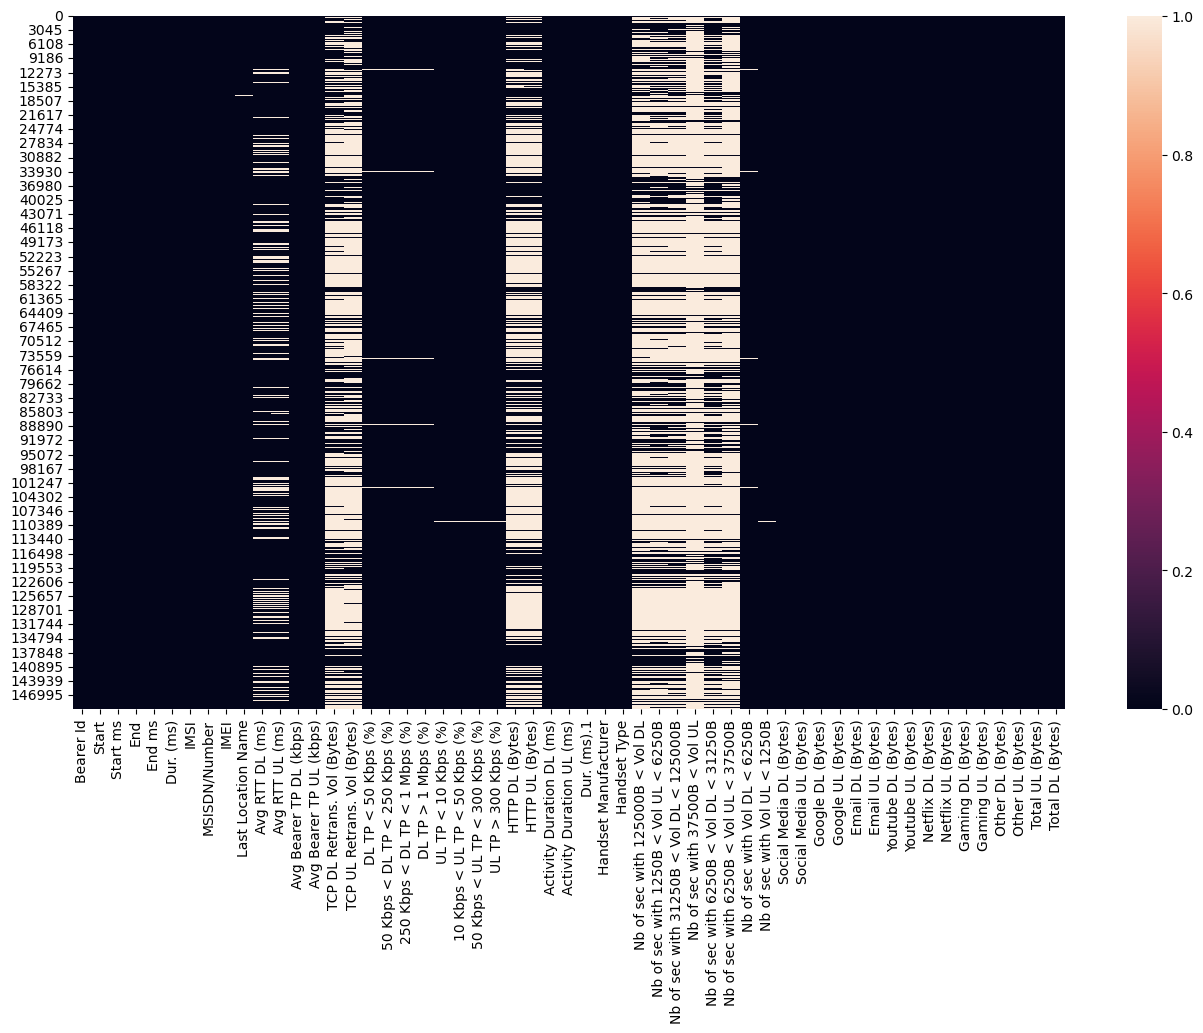

In [56]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.show()

# Checking Datatypes

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149010 entries, 0 to 149999
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 149010 non-null  object        
 1   Start                                     149010 non-null  datetime64[ns]
 2   Start ms                                  149010 non-null  float64       
 3   End                                       149010 non-null  datetime64[ns]
 4   End ms                                    149010 non-null  float64       
 5   Dur. (ms)                                 149010 non-null  float64       
 6   IMSI                                      149010 non-null  object        
 7   MSISDN/Number                             149010 non-null  object        
 8   IMEI                                      149010 non-null  object        
 9   Last Location Name  

In [58]:
# Calculate missing values and percentages
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Combine into a DataFrame
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': missing_percentage
})

# Sort by number of missing values
missing_data_sorted = missing_data.sort_values(by='Missing Values', ascending=False)

# Display the sorted DataFrame
print(missing_data_sorted)

                                          Missing Values  Percentage Missing
Nb of sec with 37500B < Vol UL                    129375           86.823032
Nb of sec with 6250B < Vol UL < 37500B            111135           74.582243
Nb of sec with 125000B < Vol DL                    97000           65.096302
TCP UL Retrans. Vol (Bytes)                        96368           64.672170
Nb of sec with 31250B < Vol DL < 125000B           93162           62.520636
Nb of sec with 1250B < Vol UL < 6250B              92448           62.041474
Nb of sec with 6250B < Vol DL < 31250B             87987           59.047715
TCP DL Retrans. Vol (Bytes)                        87906           58.993356
HTTP UL (Bytes)                                    81578           54.746661
HTTP DL (Bytes)                                    81228           54.511778
Avg RTT DL (ms)                                    27685           18.579290
Avg RTT UL (ms)                                    27666           18.566539

# Dropping the columns which have more than 50% of missing values

In [59]:
# Drop columns with missing values above the threshold
columns_to_drop = missing_data_sorted[missing_data_sorted['Percentage Missing'] > 50].index
df = df.drop(columns=columns_to_drop)

# Imputing remaining missing values

In [60]:
# Impute remaining missing values
for column in df.columns:
    if df[column].dtype == 'object':  # Categorical data
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:  # Numerical data
        df[column].fillna(df[column].mean(), inplace=True)

print("Columns dropped:", columns_to_drop)

Columns dropped: Index(['Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol UL < 37500B',
       'Nb of sec with 125000B < Vol DL', 'TCP UL Retrans. Vol (Bytes)',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 6250B < Vol DL < 31250B', 'TCP DL Retrans. Vol (Bytes)',
       'HTTP UL (Bytes)', 'HTTP DL (Bytes)'],
      dtype='object')


In [61]:
df.isnull().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

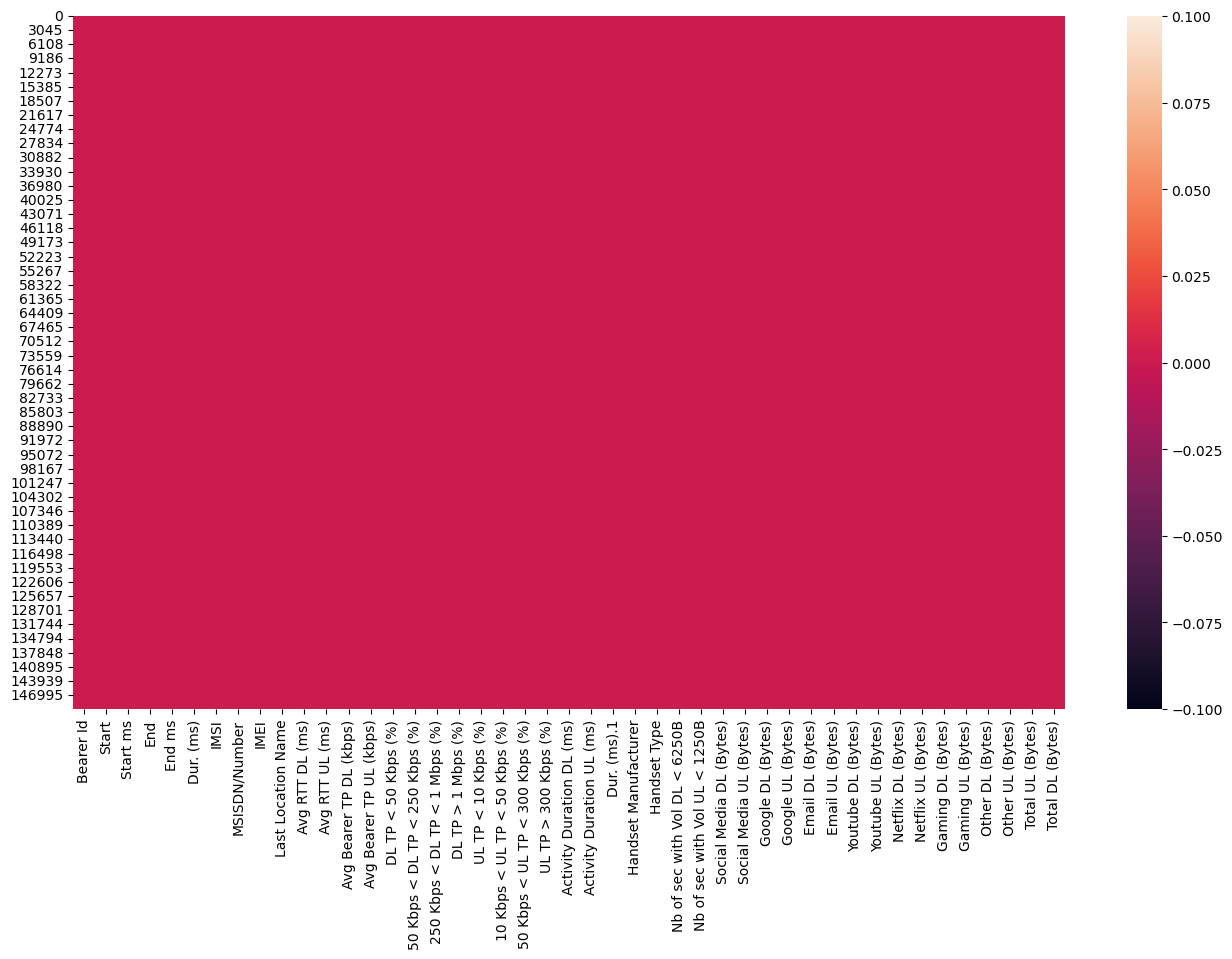

In [62]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.show()

In [63]:
# Calculate missing values and percentages
missing_na_values = df.isna().sum()
missing_na_percentage = (missing_na_values / len(df)) * 100

# Combine into a DataFrame
missing_na_data = pd.DataFrame({
    'Missing NA Values': missing_na_values,
    'Percentage NA Missing': missing_na_percentage
})

# Sort by number of missing values
missing_na_data_sorted = missing_na_data.sort_values(by='Missing NA Values', ascending=False)

# Display the sorted DataFrame
print(missing_na_data_sorted)

                                Missing NA Values  Percentage NA Missing
Bearer Id                                       0                    0.0
Activity Duration UL (ms)                       0                    0.0
Handset Manufacturer                            0                    0.0
Handset Type                                    0                    0.0
Nb of sec with Vol DL < 6250B                   0                    0.0
Nb of sec with Vol UL < 1250B                   0                    0.0
Social Media DL (Bytes)                         0                    0.0
Social Media UL (Bytes)                         0                    0.0
Google DL (Bytes)                               0                    0.0
Google UL (Bytes)                               0                    0.0
Email DL (Bytes)                                0                    0.0
Email UL (Bytes)                                0                    0.0
Youtube DL (Bytes)                              0  

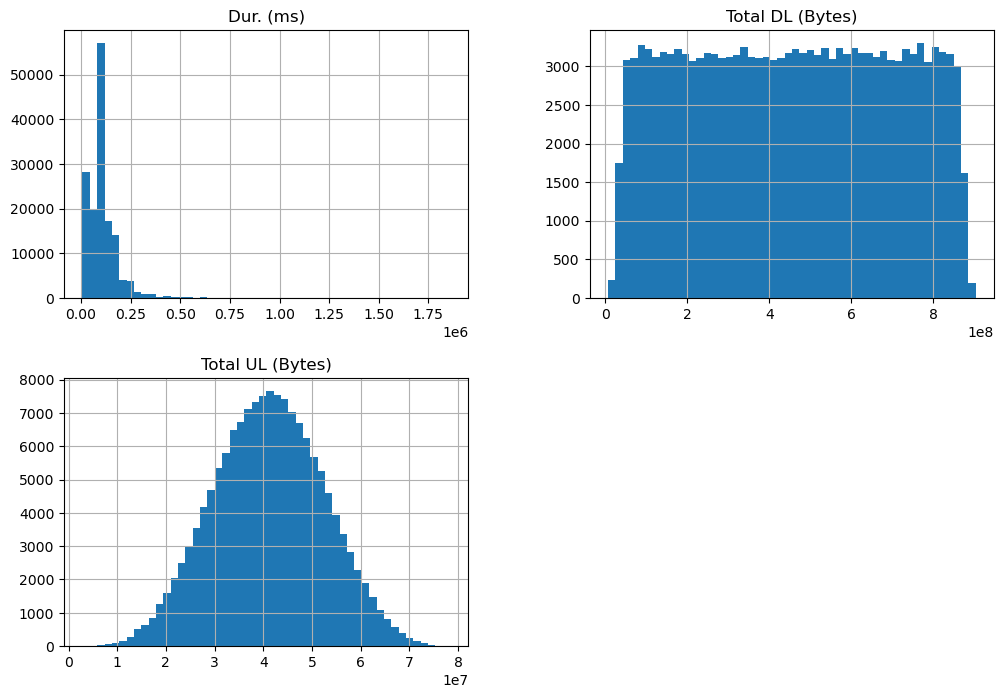

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical columns
df[['Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)']].hist(bins=50, figsize=(12, 8))
plt.show()

In [65]:
##separating the numerical features

numerical_cols = df.select_dtypes(include=["float64"]).columns

In [66]:
correlation_matrix = df[numerical_cols].corr()

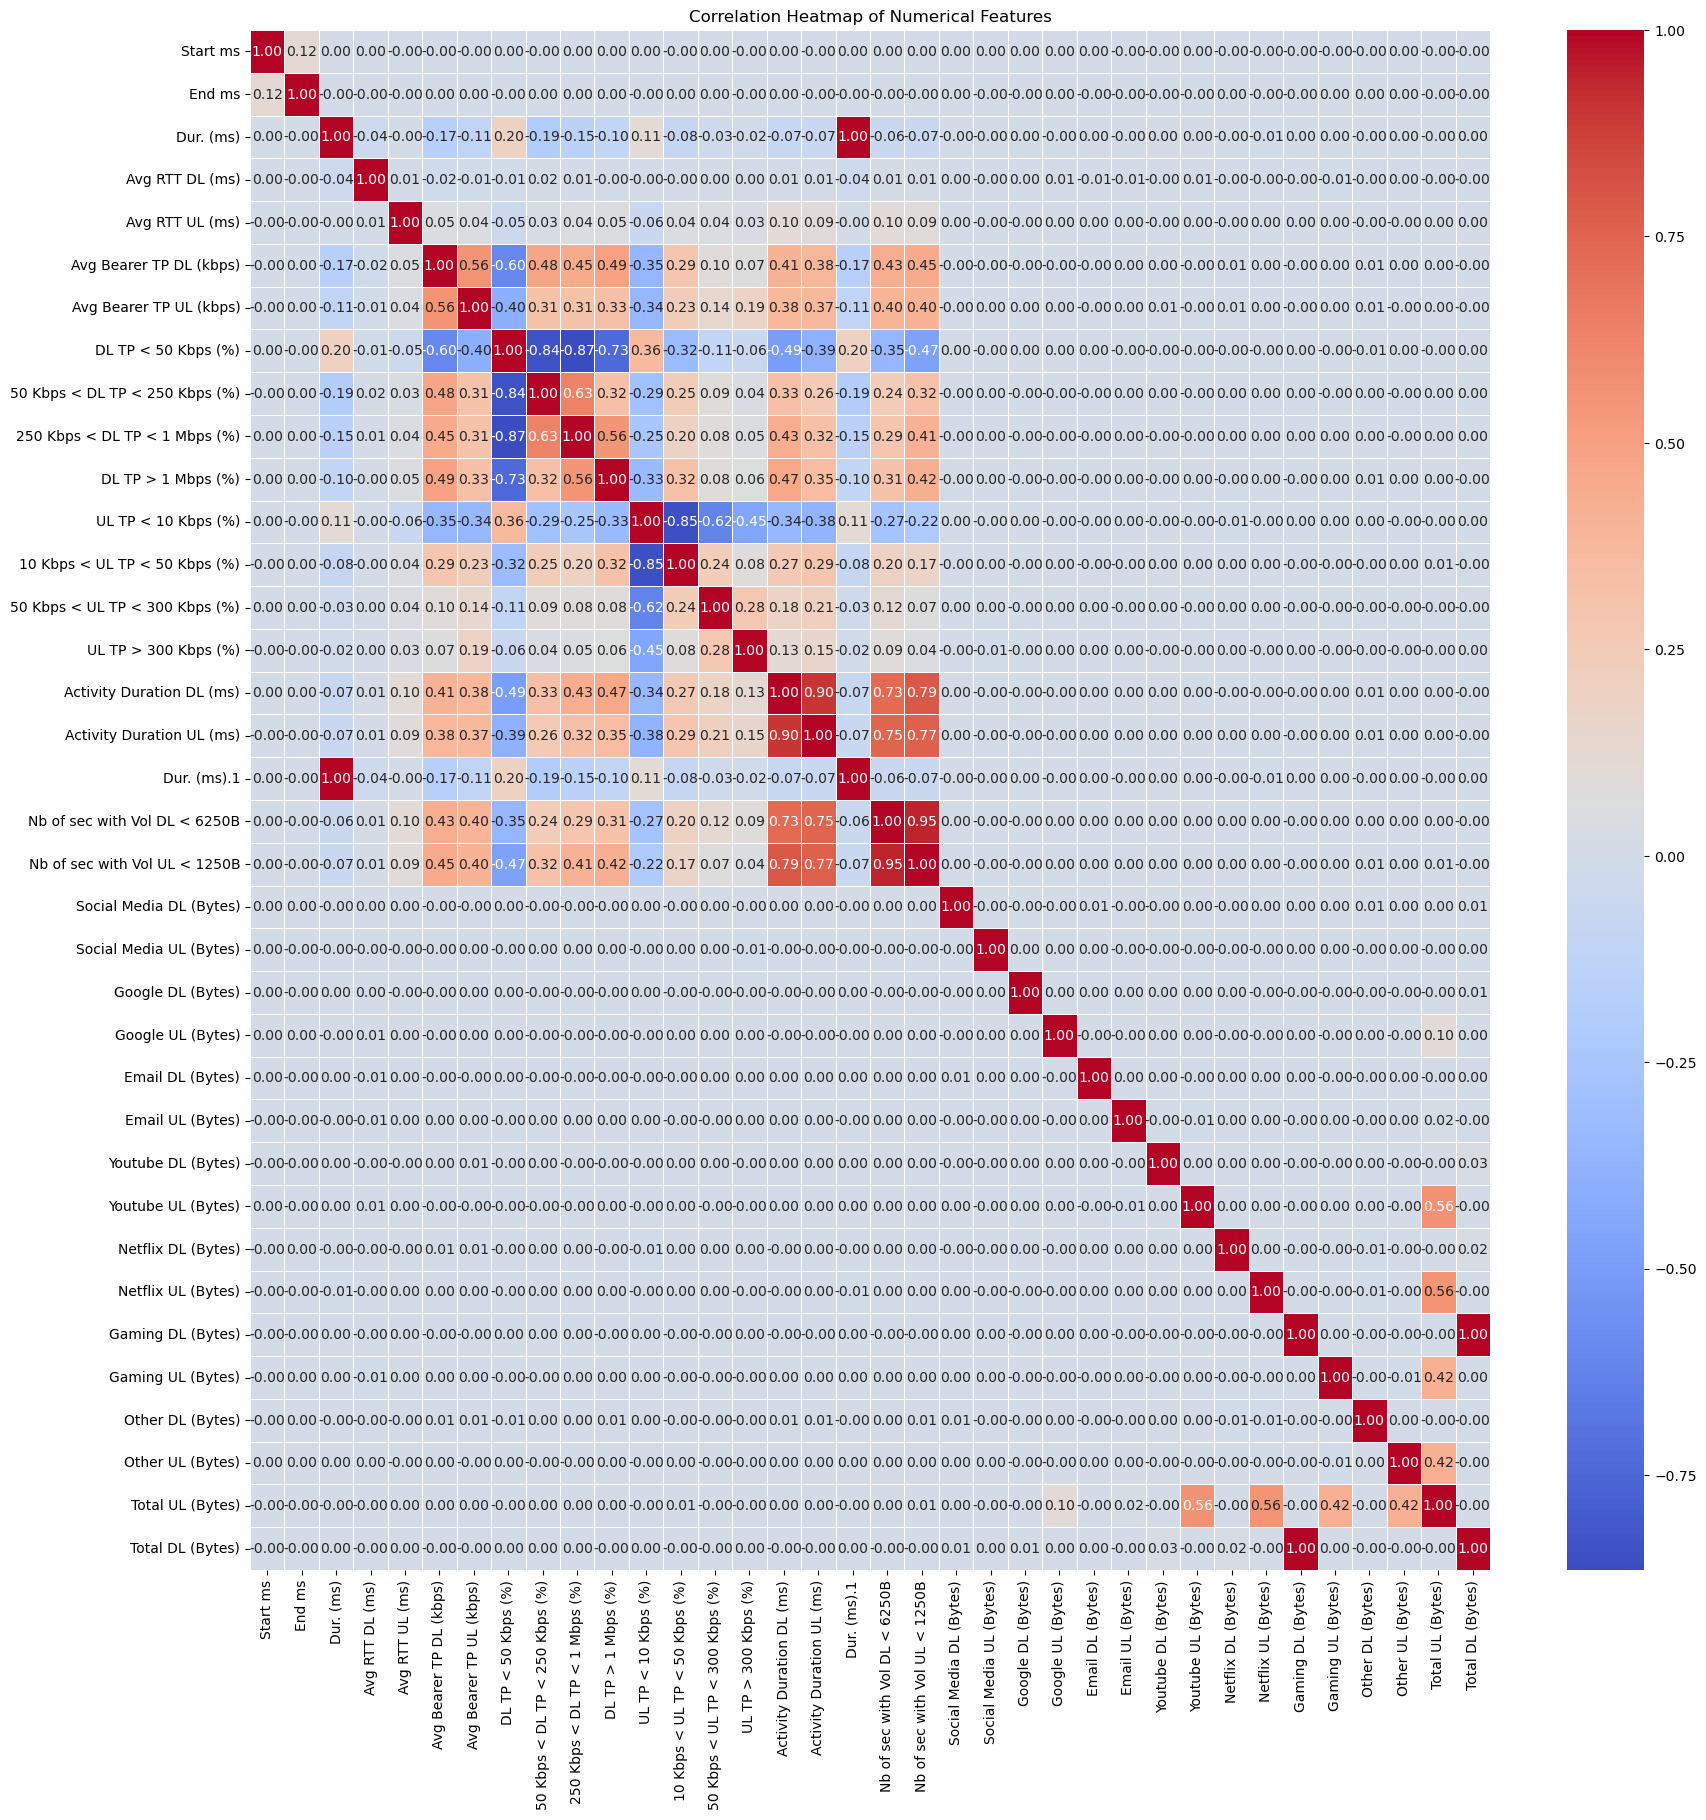

In [67]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# IDENTIFY AND TREAT OUTLIERS

In [68]:
## IQR outlier detection

df_cleaned = df.copy() ##creating a copy of original dataframe

for column in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))
    df_cleaned[column] = df[column].where(~outliers, df[column].mean())
    

    
# Record the shape of the DataFrame before outlier removal
shape_before = df.shape

# Record the shape of the DataFrame after outlier removal
shape_after = df_cleaned.shape

# Print the shapes before and after outlier removal
print("Shape of DataFrame before outlier removal:", shape_before)
print("Shape of DataFrame after outlier removal:", shape_after)

# Verify the number of rows dropped (if any)
rows_dropped = shape_before[0] - shape_after[0]
print("Number of rows dropped:", rows_dropped)

Shape of DataFrame before outlier removal: (149010, 45)
Shape of DataFrame after outlier removal: (149010, 45)
Number of rows dropped: 0


In [70]:
# Save the DataFrame to an Excel file
df_cleaned.to_excel('data_cleaned.xlsx', index=False, engine='openpyxl')